In [ ]:
#import packages and libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
palette ={"A": "C0", "B": "C1", "C": "C2", "Total": "k"}

In [ ]:
#read csv files
data = pd.read_csv('./Churn_Modelling.csv')
data

### EXPLORATORY DATA ANALYSIS

In [3]:
#checking for datatypes and informations about the features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
#Describe the dataframe 
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
#checking for missing values
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
#checking for duplicates
len(data.duplicated())

10000

In [7]:
#checking the uniqueness of the Gender feature
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [8]:
#checking the uniqueness of the Geography feature
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
#Checking the uniqueness of the Tenure feature
data['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [10]:
#Calculating to see how many people fall into corresponding Tenures
data['Tenure'].value_counts().to_frame()

,Tenure
2,1048
1,1035
7,1028
8,1025
5,1012
3,1009
4,989
9,984
6,967
10,490


In [11]:
#total number of males and females in the dataframe
data['Gender'].value_counts().to_frame()

,Gender
Male,5457
Female,4543


In [12]:
#count of the different countries in the dataframe
data['Geography'].value_counts().to_frame()

,Geography
France,5014
Germany,2509
Spain,2477


In [13]:
#Count of the number of customers who churned or not
data['Exited'].value_counts().to_frame()

,Exited
0,7963
1,2037


In [14]:
#churned customers had cards compared to those who didnt 
data['HasCrCard'].value_counts().to_frame()

,HasCrCard
1,7055
0,2945


In [15]:
#there are more members who churned that were active memebers
data['IsActiveMember'].value_counts().to_frame()

,IsActiveMember
1,5151
0,4849


### CLEANING THE DATA

In [16]:
#removing columns not needed in the model
data = data.drop(['RowNumber', 'CustomerId','Surname'], axis = 1)

In [17]:
#rename columns to lower case
data.columns = data.columns.str.lower()

### VISUALIZING THE DATA

In [18]:
#extracting only features that are numerical
numerical_data = data.select_dtypes(include = 'number')

/Users/chuks/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

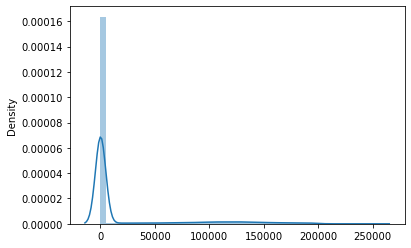

In [19]:
# sns.pairplot(data)
sns.distplot(numerical_data)

In [20]:
### A quick visualization shows that, tenure, number of products, has card,
### exited, age, and credit score are all discrete variables.
### Estimated salary, balance are continuous variables

In [21]:
def plot_count_box(df, grouping_var, dependent_var, orient = 'v'):
    '''
    Function to plot two plots side by side.
    The left plot will be a count plot of 'grouping_var'
    The right plot will be a boxplot of 'dependent_var' grouped by 'grouping var'
    Inputs: 
    df = dataframe
    grouping_var = variable to perform the agregation
    dependent_var = variable to plot the boxplot
    Output:
    A canvas with a counplot on the left and boxplot on the right
    The boxplots are ordered based on the median value of the dependent feature.
    '''

    # Getting a list of unique valus for the grouping variable
    levels = list(df[grouping_var].unique())    
    diver = sns.color_palette("Paired", len(levels)) # RdBu, Set3, Paired
    # Setting a dictionary of {'value': color} to use in each plot
    cmap = dict(zip(levels,diver))

    mean_price = pd.DataFrame(df.groupby([grouping_var])[dependent_var].median().sort_values()).reset_index()

    fig, ax = plt.subplots(1,2,figsize=(16,8))
    if ( orient == 'v' ):
        sns.countplot(x = grouping_var, data = df, order = df[grouping_var].value_counts().index, ax = ax[0], palette = cmap) 
        sns.boxplot(y= dependent_var , x= grouping_var, data = df, order = mean_price[grouping_var], ax = ax[1], palette=  cmap)
        ax[1].yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
    else:
        sns.countplot(y = grouping_var, data = df, order = df[grouping_var].value_counts().index, ax = ax[0], palette = cmap)
        sns.boxplot(x= dependent_var , y= grouping_var, data = df, order = mean_price[grouping_var], ax = ax[1], palette = cmap)
        ax[1].xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x/1000)}K'))        
    fig.show()
    pass

In [22]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline
data1 = pd.read_csv('./Churn_Modelling.csv')
data1

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [23]:
#created a new data frame for only customers who are churned
churned = data1[data1.Exited == 1]

#data frame for customers who didnt churn
notchurned = data1[data1.Exited == 0]


/var/folders/zz/nrq5wf4d1nggkmxz_00gpldh0000gn/T/ipykernel_64893/463466266.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


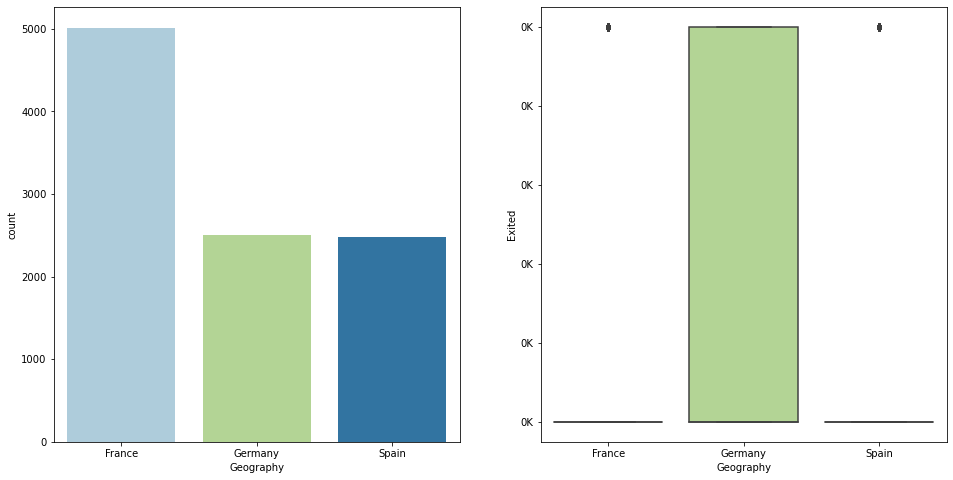

In [24]:
plot_count_box(data1, 'Geography', 'Exited')
##Over 50% of our customers were from France, while 25% were from both Germany and Spain respectively

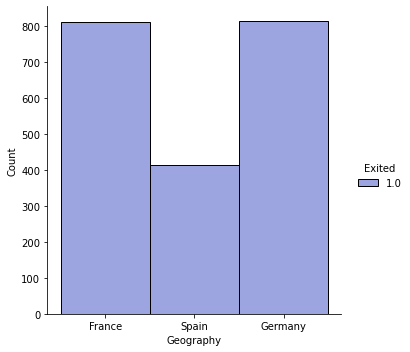

In [25]:
#displot showing the geography of the customer and the cusomters who churned
sns.displot(data1, x = 'Geography', hue = churned['Exited'], palette=sns.color_palette('coolwarm', as_cmap = True))
#17% of our customers from France and 32% from Germany churned, while only 16% from Spain did
#Customers from Germany are 2 times more likely to churn than our customers from Spain
#we found correlation between customers Geography and their churn rate

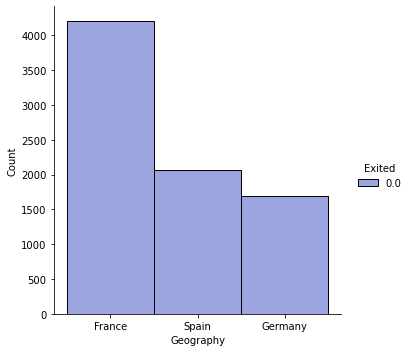

In [26]:
#displot showing the geography of the customer and the cusomters who didnt churn
sns.displot(data1, x = 'Geography', hue = notchurned['Exited'],palette=sns.color_palette('coolwarm', as_cmap = True))

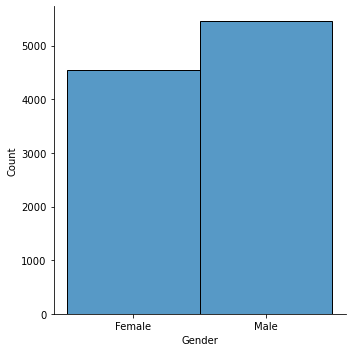

In [27]:
#displot of the total number of genders in our gender feature
sns.displot(data1, x = 'Gender', palette=sns.color_palette('coolwarm', as_cmap = True))
#The majority of our customers when it came to gender were 53.5% male and 46.5% female

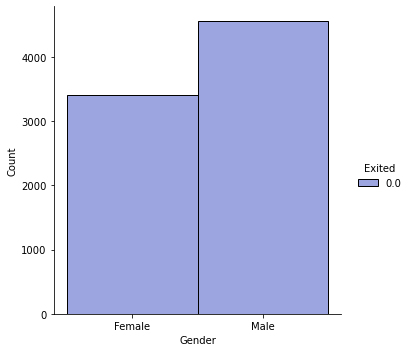

In [28]:
#a displot showing the genders and the customers who didnt churn
sns.displot(data1, x = 'Gender', hue = notchurned['Exited'], palette=sns.color_palette('coolwarm', as_cmap = True))

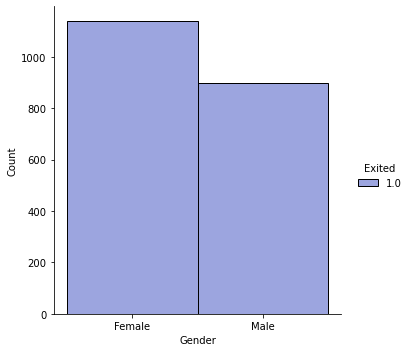

In [29]:
#a displot showing the gebders and the customers who churned
sns.displot(data1, x = 'Gender', hue = churned['Exited'], palette=sns.color_palette('coolwarm', as_cmap = True))

In [30]:
#displot of the tenure and the churn rate
sns.displot(data1, x = 'Tenure', hue = churned['Exited'], ax=axes[0])
sns.displot(data1, x = 'Tenure', hue = notchurned['Exited'], ax=axes[1])

NameError: name 'axes' is not defined

In [ ]:
#The number of products and the churn rate were correlated. We discovered that most customers who used 1 product
#were likely to churn, and the more products used by the customers, the more likely they stayed

bar = sns.histplot(data=data1, x='NumOfProducts', hue = churned['Exited'],color='#42b7bd', palette=sns.color_palette('coolwarm', as_cmap = True))
# you can search color picker in google, and get hex values of you fav color

patch_h = [patch.get_height() for patch in bar.patches]   
# patch_h contains the heights of all the patches now

idx_tallest = np.argmax(patch_h) 
# np.argmax return the index of largest value of the list

#assigns the color pinkto the tallest bar plot
bar.patches[idx_tallest].set_facecolor('#a834a8') 


 

In [ ]:
bar = sns.histplot(data=data1, x='NumOfProducts', hue = notchurned['Exited'],color='#42b7bd', palette=sns.color_palette('coolwarm', as_cmap = True))
# you can search color picker in google, and get hex values of you fav color

patch_h = [patch.get_height() for patch in bar.patches]   
# patch_h contains the heights of all the patches now

idx_tallest = np.argmax(patch_h) 
# np.argmax return the index of largest value of the list

bar.patches[idx_tallest].set_facecolor('#a834a8') 

In [ ]:
#Graph of the estimated salary against customers who churned and those who didnt
#The estimated salary had no influence on our customers churn rate
figsize=(25,25)
sns.displot(data1, x = 'EstimatedSalary', hue = churned['Exited'], ax=axes[0])
sns.displot(data1, x = 'EstimatedSalary', hue = notchurned['Exited'], ax=axes[1])

In [ ]:
#value count of the various customer age and the number of customers with the age range
data1['Age'].value_counts()

In [ ]:
#maximum age of our customer
data1['Age'].max()

In [ ]:
#using pd cut to bin age into steps of 10
data1['binned_age'] = pd.cut(x=data1['Age'], bins=[17, 20, 30, 40, 50, 60, 70, 80, 90, 100])

In [ ]:
#display binned age
data1['binned_age']

In [ ]:
#creating a new dataframe with the Age, customer ID and Exited column 
new_data= data1.groupby(["Age",'Exited'])["CustomerId"].count().reset_index()

In [ ]:
#renaming customer ID to count 
new_data.rename(columns={"CustomerId" : "count"},inplace=True)

In [ ]:
#adding the binned age to our new dataframe age
new_data['binned_age'] = pd.cut(x=new_data['Age'], bins=[17, 24, 28, 32, 34, 36, 38, 40, 46, 50,100])

In [ ]:
new_data

In [ ]:
# The bar plot shows a binned age of the customers and their rate of churn
#we see that customers between age 32 to 40 are less likely to churn and customer older than that churned
plt.figure(figsize=(15,7))
#plt.title('Frequency of age against Churn', size='55', fontweight='bold')
sns.barplot(data = new_data, x = 'binned_age',y = 'count', hue = 'Exited')

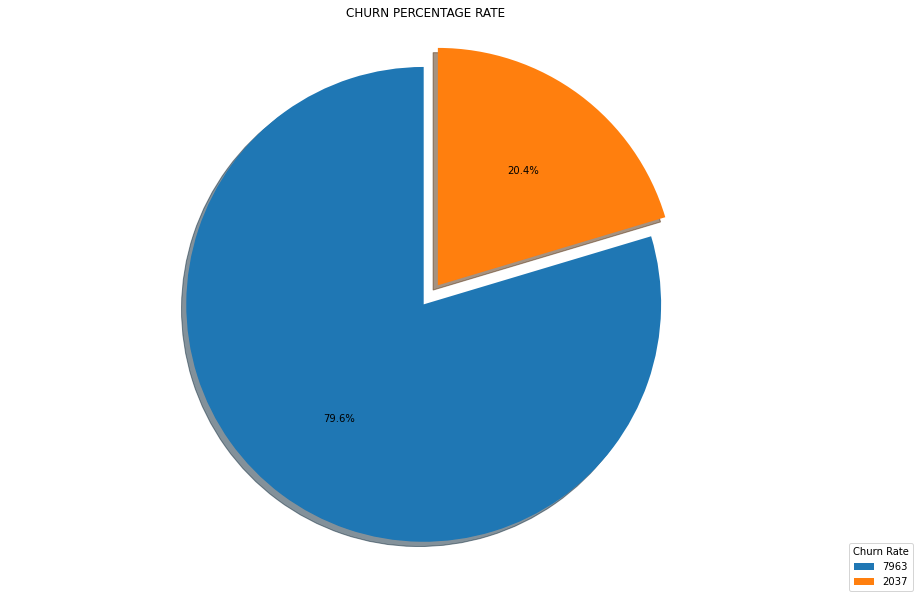

In [31]:
#Pie chart of the churn rate
#explode variable explodes a part of the chart 
#colors tab:blue and tab:orange, are colors from the tableau color library
explode = (0, 0.1)
colors = ["tab:blue", 'tab:orange','r','b','g']
fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.pie(data1.Exited.value_counts(),explode= explode, autopct='%1.1f%%', colors= colors,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("CHURN PERCENTAGE RATE")
plt.legend(data1.Exited.value_counts(),
          title="Churn Rate",
          loc="center left",
          bbox_to_anchor=(1, 0))
plt.show()